In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
from tqdm import tqdm

In [2]:
# prepare object points
nx = 9 # Numero de interseções em X do tabuleiro
ny = 6 # Numero de interseções em Y do tabuleiro
chessboard_size = (nx, ny)

# Array dos pontos detectados
obj_points = [] # Pontos 3d do mundo real 
img_points = [] # Pontos 3d do plano da imagem

objp = np.zeros((np.prod(chessboard_size),3),dtype=np.float32)
objp[:,:2] = np.mgrid[0:chessboard_size[0], 0:chessboard_size[1]].T.reshape(-1,2)

100%|██████████| 16/16 [10:21<00:00, 38.87s/it]


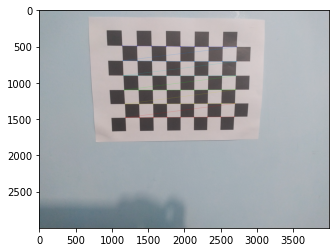

In [3]:
# USANDO UM CONJUNTO DE IMAGENS SEM A OPÇÃO DE CALIBRAÇÃO AUTOMATICA
calibration_paths = glob.glob('./calibration_images/*')

# Iteração nas imagens para encontrar a matriz intriseca
for image_path in tqdm(calibration_paths):
    #fname = 'chessboard.jpg.jpg'
    img = cv2.imread(image_path)
    # Conversão para escala de cinza
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Método para achar as interseções do tabuleiro
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    
    # Se encontrado, desenhar os cantos da interseção
    if ret == True:
        # Desenhar e printar o tabuleiro com os cantos da interseção
        cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
        plt.imshow(img)
        # Critério para aumentar precisão
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
        # Refinamento da localização dos cantos por meio do critério.
        cv2.cornerSubPix(gray, corners, (5,5), (-1,-1), criteria)
        obj_points.append(objp)
        img_points.append(corners)

In [4]:
ret, K, dist, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points,gray.shape[::-1], None, None)

In [5]:
print("root mean square (RMS) re-projection error:")
print(ret)

root mean square (RMS) re-projection error:
2.5170440148780897


In [6]:
print("camera matrix k:")
print(K)

camera matrix k:
[[3.05567651e+03 0.00000000e+00 2.02098490e+03]
 [0.00000000e+00 3.05832457e+03 1.45188255e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


In [7]:
print("distortion coefficients: ")
print(dist)

distortion coefficients: 
[[ 0.06071813  0.06049765 -0.00485753  0.00295059 -0.50794184]]


In [8]:
print("rotation vector:")
print('[%s]' % ', '.join(map(str, rvecs)))

rotation vector:
[[[-0.04031595]
 [-0.51472601]
 [ 0.01590588]], [[-0.04313443]
 [-0.02288544]
 [-0.00461105]], [[-0.13442322]
 [ 0.06422814]
 [-0.00194063]], [[-0.36450805]
 [-0.05600838]
 [-0.00371843]], [[0.01552579]
 [0.070823  ]
 [0.00421824]], [[ 0.01048625]
 [-0.08307805]
 [ 0.00133768]], [[-0.11187243]
 [-0.08072887]
 [-0.00723036]], [[-0.00063718]
 [ 0.30995224]
 [ 0.00821262]], [[-0.12006887]
 [-0.28768389]
 [-0.21991791]], [[-0.10945932]
 [-0.18579979]
 [-0.02570054]], [[-0.01060288]
 [ 0.27359304]
 [ 0.02086429]], [[-0.27142503]
 [-0.5443734 ]
 [ 0.02437295]], [[-0.00106781]
 [ 0.33722196]
 [ 0.00419419]], [[-0.25350263]
 [-0.25540238]
 [ 0.45829841]], [[-0.425766  ]
 [-0.39880014]
 [ 0.17431084]], [[ 0.14117513]
 [-0.05831968]
 [-0.00445395]]]


In [9]:
print("translation vector: ")
print('[%s]' % ', '.join(map(str, tvecs)))

translation vector: 
[[[-6.35846308]
 [-4.49739186]
 [14.67329267]], [[-4.44996517]
 [-2.02332399]
 [16.2196259 ]], [[-0.95779753]
 [ 0.637603  ]
 [16.11645075]], [[-4.74672661]
 [-2.09362076]
 [17.09414363]], [[-0.04661828]
 [-5.14683351]
 [16.26021535]], [[-8.20704588]
 [-5.14714942]
 [16.4099245 ]], [[-7.57874848]
 [ 1.07722336]
 [16.42384382]], [[-0.8720379 ]
 [-5.30513991]
 [18.3827725 ]], [[-6.79699719]
 [-3.91881808]
 [13.64634103]], [[-4.82419625]
 [-3.17066104]
 [14.56723866]], [[-1.1417116 ]
 [-5.39521004]
 [17.17918661]], [[-5.31899075]
 [-1.5391355 ]
 [15.05190503]], [[-1.37462039]
 [-4.94950435]
 [16.47305319]], [[-1.28384795]
 [-5.17162918]
 [16.67950888]], [[-5.8372744 ]
 [-0.58103217]
 [14.74003643]], [[-4.36028275]
 [-4.78253445]
 [15.42956327]]]


In [10]:
import PIL.ExifTags
import PIL.Image
# Dados exif para obter a distância focal 
exif_img = PIL.Image.open(calibration_paths[0])
exif_data = {
PIL.ExifTags.TAGS[k]:v
for k, v in exif_img._getexif().items()
if k in PIL.ExifTags.TAGS}# Distância focal em tupla
focal_length_exif = exif_data['FocalLength']# Distância forcal em decimal
focal_length = focal_length_exif[0]/focal_length_exif[1]
exif_data

AttributeError: 'NoneType' object has no attribute 'items'

In [ ]:
#USANDO UMA IMAGEM ENCONTRADA NA NET
fname = 'chessboard.jpg'
    # Conversão para escala de cinza
img = cv2.imread(fname)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Método para achar as interseções do tabuleiro
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    
    # Se encontrado, desenhar os cantos da interseção
if ret == True:
    # Desenhar e printar o tabuleiro com os cantos da interseção
    cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
    plt.imshow(img)
    # Critério para aumentar precisão
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
    # Refinamento da localização dos cantos por meio do critério.
    cv2.cornerSubPix(gray, corners, (5,5), (-1,-1), criteria)
    obj_points.append(objp)
    img_points.append(corners)

In [ ]:
ret, K, dist, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points,gray.shape[::-1], None, None)

In [ ]:
ret

In [ ]:
K

In [ ]:
dist

In [ ]:
rvecs

In [11]:
img = cv2.imread('teclado.jpg')
h,  w = img.shape[:2]
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(K, dist, (w,h), 1, (w,h))

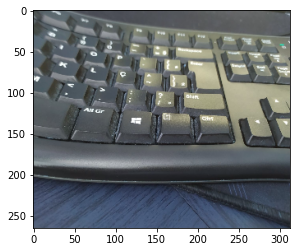

In [12]:
dst = cv2.undistort(img, K, dist, None, newcameramtx)

x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
cv2.imwrite('calibresult.png', dst)
plt.imshow(dst)

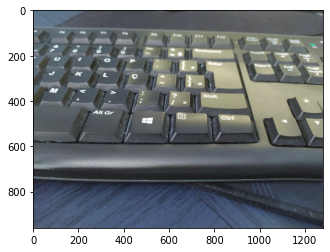

In [13]:
plt.imshow(img)

In [14]:
mean_error = 0
for i in range(len(obj_points)):
    imgpoints2, _ = cv2.projectPoints(obj_points[i], rvecs[i], tvecs[i], K, dist)
    error = cv2.norm(img_points[i], imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    mean_error += error
print( "total error: {}".format(mean_error/len(obj_points)) )

total error: 0.3310799959900762


In [ ]:
#Save parameters into numpy file
np.save("./camera_params/ret", ret)
np.save("./camera_params/K", K)
np.save("./camera_params/dist", dist)
np.save("./camera_params/rvecs", rvecs)
np.save("./camera_params/tvecs", tvecs)
#np.save("./camera_params/FocalLength", focal_length)